In [13]:
# Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
# Loading the Dataset
data = pd.read_csv('Health Monitoring Dataset.csv')

In [5]:
# Analyse the Top 5 rows of the Dataset
data.head()

,PatientID,Age,Gender,HeartRate,BloodPressure,RespiratoryRate,BodyTemperature,ActivityLevel,OxygenSaturation,SleepQuality,StressLevel,Timestamp
0,1,69,Male,60.993428,130/85,15,98.885236,resting,95.0,excellent,low,2024-04-26 17:28:55.286711
1,2,32,Male,98.723471,120/80,23,98.281883,walking,97.0,good,high,2024-04-26 17:23:55.286722
2,3,78,Female,82.295377,130/85,13,98.820286,resting,98.0,fair,high,2024-04-26 17:18:55.286726
3,4,38,Female,80.000000,111/78,19,98.412594,running,98.0,poor,moderate,2024-04-26 17:13:55.286728
4,5,41,Male,87.531693,120/80,14,99.369871,resting,98.0,good,low,2024-04-26 17:08:55.286731


In [7]:
# Let’s have a look at whether the data contains any null values
data.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

In [9]:
# So, the data contains null values in body temperature and oxygen saturation columns. For simplicity, 
# let's fill the null values using the median value

median_body_temp = data['BodyTemperature'].median()
median_oxygen_sat = data['OxygenSaturation'].median()

In [11]:
# fill missing values
data['BodyTemperature'].fillna(median_body_temp, inplace=True)
data['OxygenSaturation'].fillna(median_oxygen_sat, inplace=True)

In [15]:
# Now let's check the statistics summary
data.describe()

,PatientID,Age,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,51.146000,80.131613,17.524000,98.584383,96.296000
std,144.481833,19.821566,9.606273,3.382352,0.461502,1.408671
min,1.000000,18.000000,60.169259,12.000000,97.094895,94.000000
25%,125.750000,34.000000,75.000000,15.000000,98.281793,96.000000
50%,250.500000,51.000000,80.000000,17.500000,98.609167,96.000000
75%,375.250000,69.000000,86.276413,20.000000,98.930497,97.000000
max,500.000000,84.000000,99.925508,23.000000,99.489150,99.000000


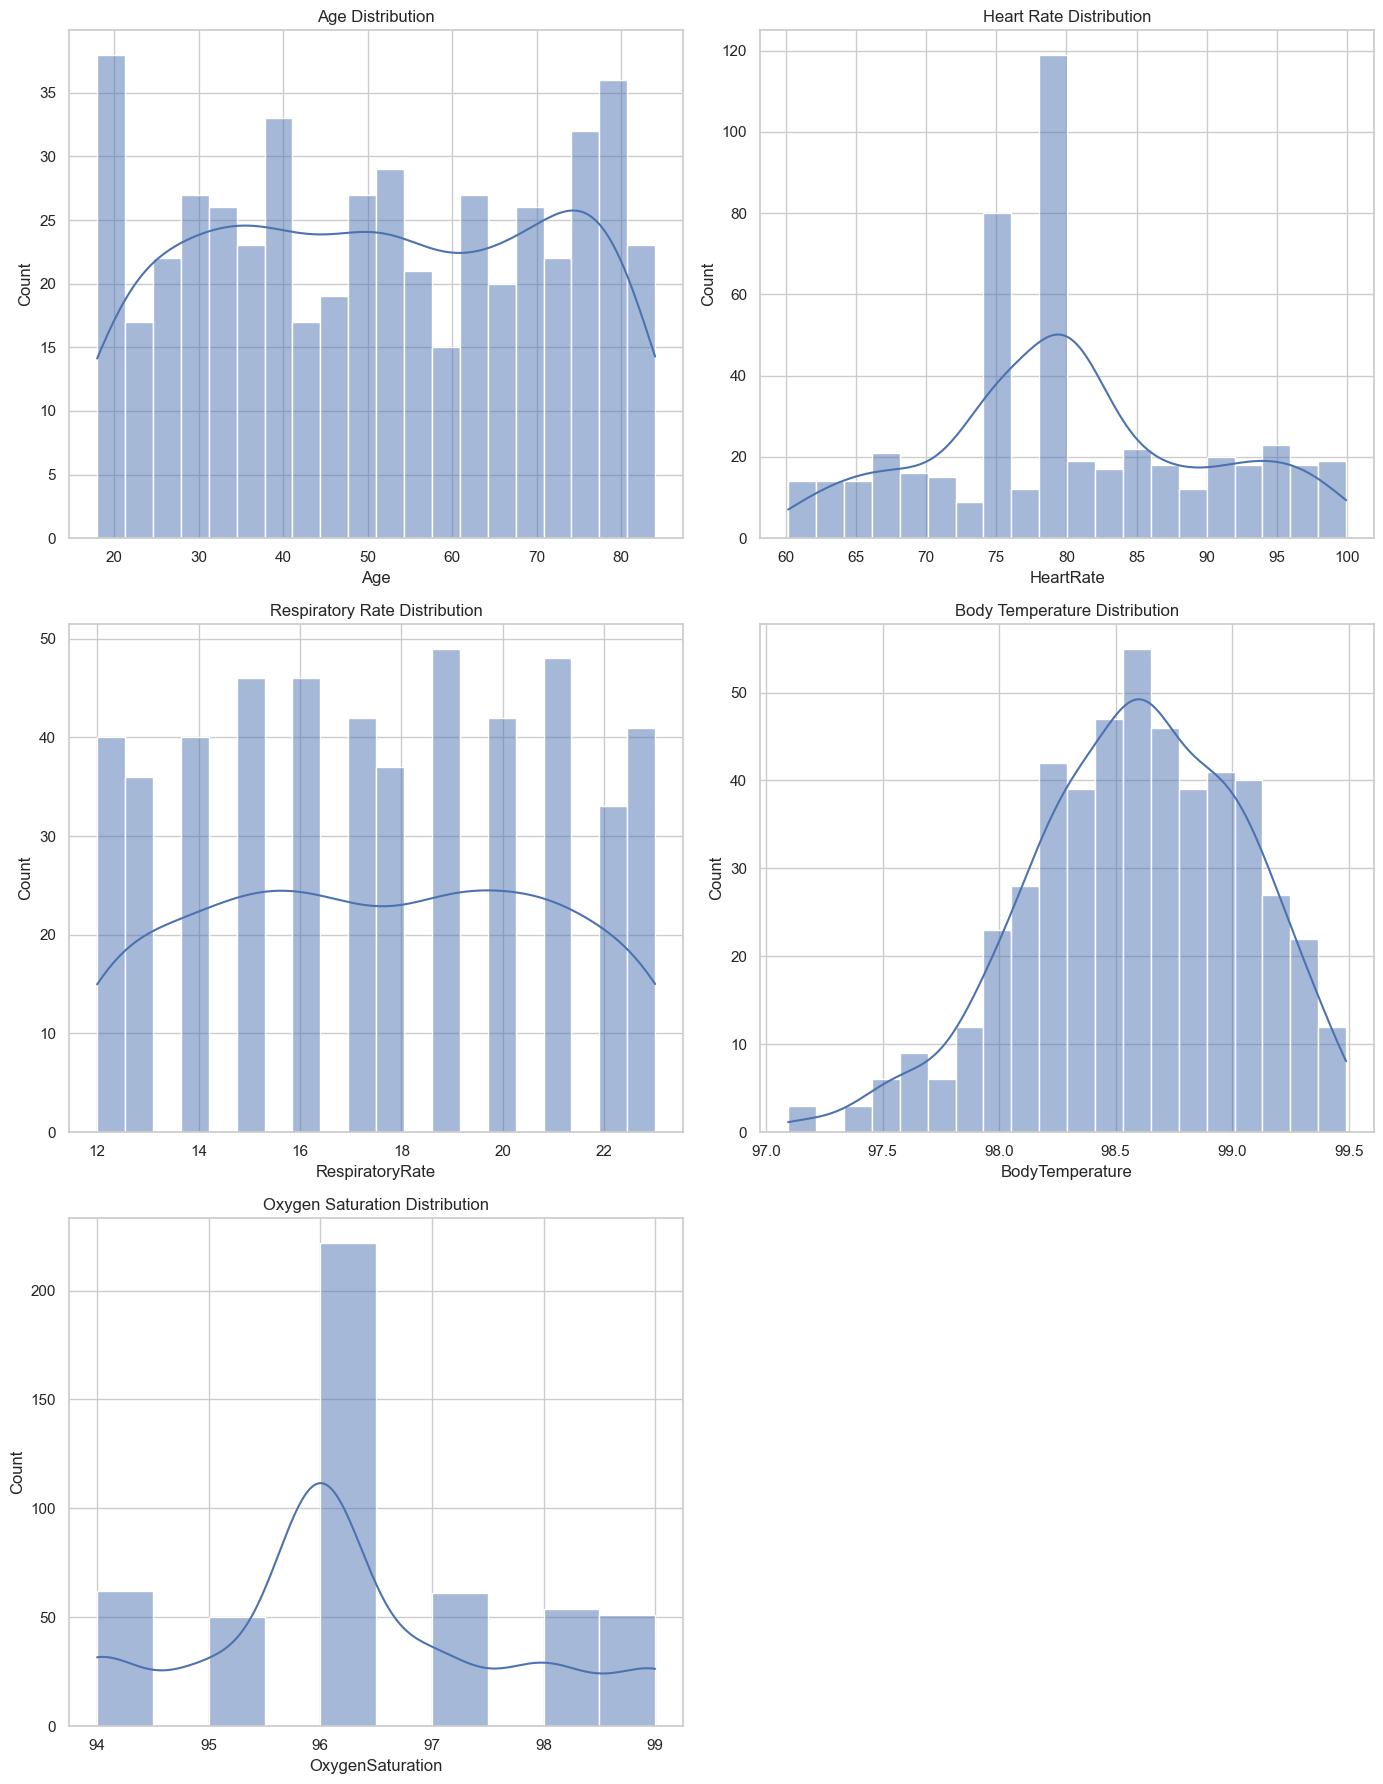

In [19]:
# plotting distributions of numerical features
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
sns.histplot(data['Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(data['HeartRate'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Heart Rate Distribution')

sns.histplot(data['RespiratoryRate'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Respiratory Rate Distribution')

sns.histplot(data['BodyTemperature'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Body Temperature Distribution')

sns.histplot(data['OxygenSaturation'], bins=10, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Oxygen Saturation Distribution')

fig.delaxes(axes[2,1])  # remove unused subplot

plt.tight_layout()
plt.show()

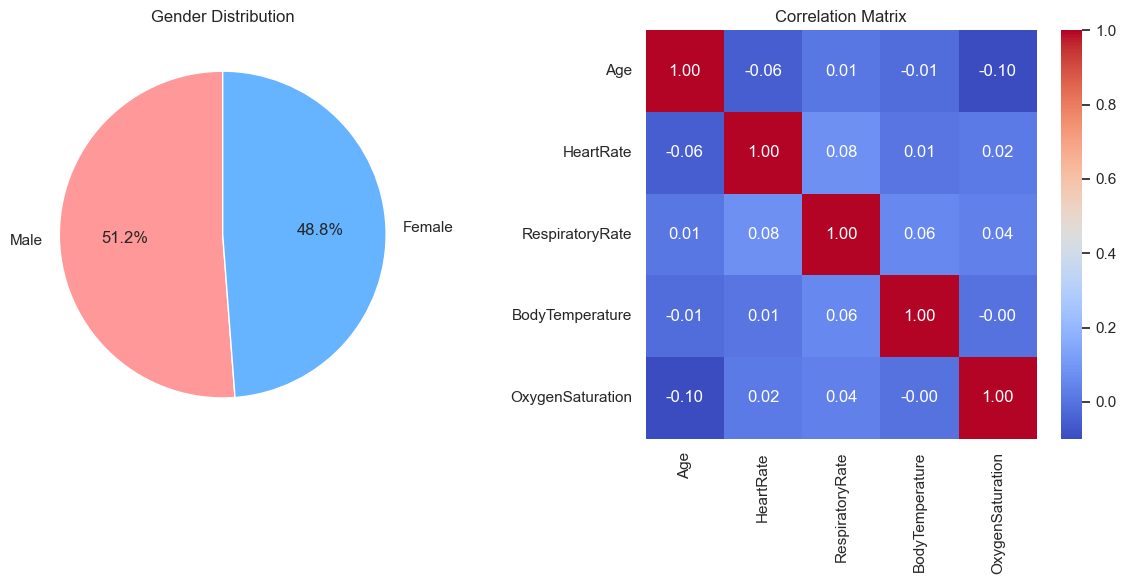

In [23]:
# Now let’s have a look at the gender distribution in the data and the correlation between the numerical columns in the dataset
# gender Distribution
gender_counts = data['Gender'].value_counts()

# correlation Matrix for numerical health metrics
correlation_matrix = data[['Age', 'HeartRate', 'RespiratoryRate', 'BodyTemperature', 'OxygenSaturation']].corr()

# plotting the findings
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# gender distribution plot
gender_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[0].set_ylabel('')
axes[0].set_title('Gender Distribution')

# correlation matrix plot
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

##### The pie chart indicates a nearly even split between male and female subjects in the dataset, with males comprising a slight majority at 51.2%. The correlation matrix shows no strong correlations between the variables, as all the values are close to zero. Specifically, none of the health metrics (Age, Heart Rate, Respiratory Rate, Body Temperature, and Oxygen Saturation) display a strong positive or negative linear relationship with one another in this particular dataset. It suggests that, for this group of individuals, changes in one metric are not strongly associated with changes in the others.

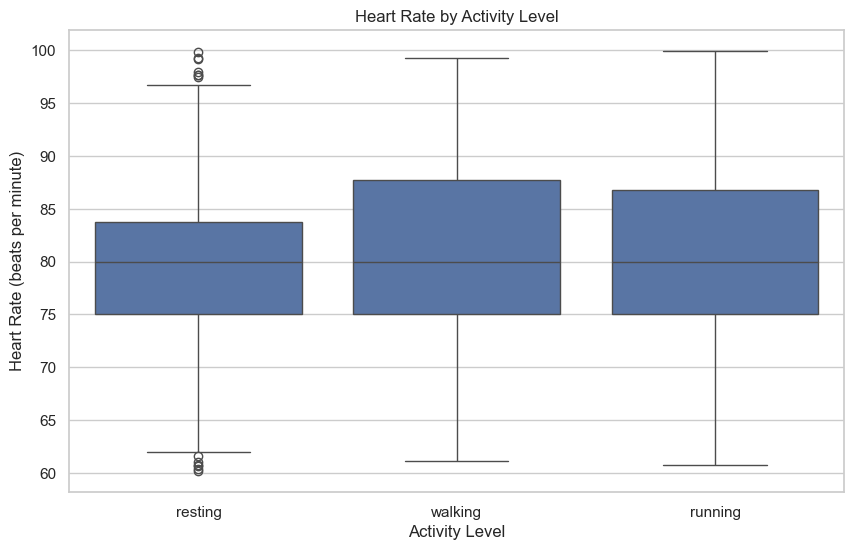

In [28]:
# Now let’s have a look at the heart rate by activity level
# heart Rate by activity level
plt.figure(figsize=(10, 6))
sns.boxplot(x='ActivityLevel', y='HeartRate', data= data)
plt.title('Heart Rate by Activity Level')
plt.ylabel('Heart Rate (beats per minute)')
plt.xlabel('Activity Level')
plt.show()

##### It shows that the median heart rate increases from resting to walking, which is expected as physical activity increases. However, the median heart rate does not significantly increase further during running compared to walking, which is unusual since we would expect a higher median heart rate for a more strenuous activity. Additionally, there is considerable overlap in the interquartile ranges between walking and running, suggesting similar variability in heart rates for these activities within the sampled population. The presence of outliers in the resting category indicates that some individuals have resting heart rates that are much higher than the typical range for the rest of the group.

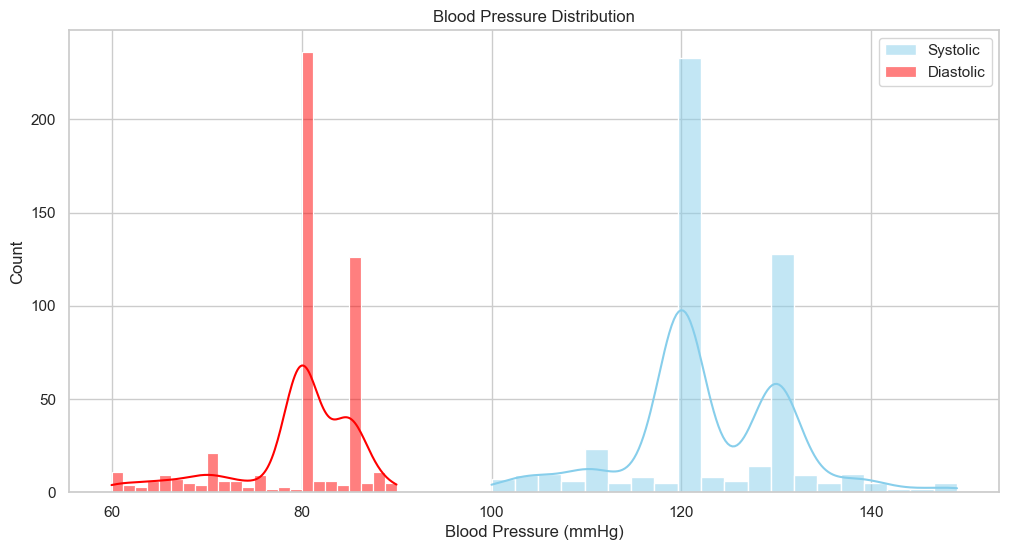

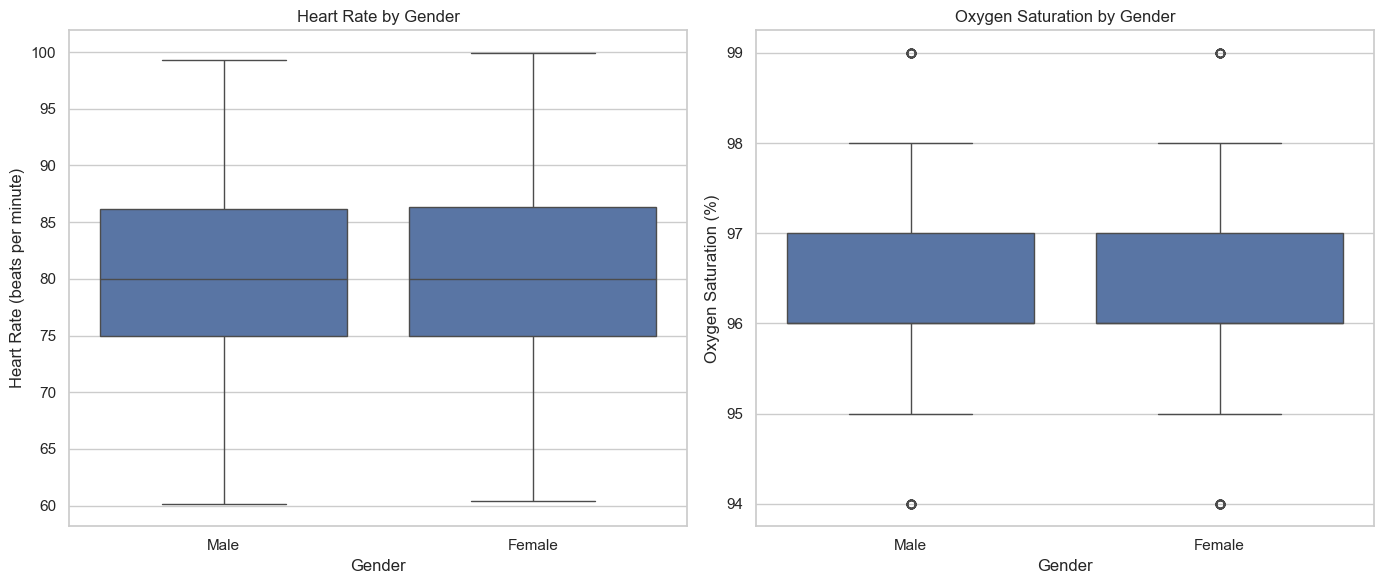

In [33]:
# Now let’s have a look at the distribution of blood pressure levels and some health metrics by gender
# extracting systolic and diastolic blood pressure for analysis
data[['SystolicBP', 'DiastolicBP']] = data['BloodPressure'].str.split('/', expand=True).astype(int)

# blood pressure distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['SystolicBP'], color="skyblue", label="Systolic", kde=True)
sns.histplot(data['DiastolicBP'], color="red", label="Diastolic", kde=True)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mmHg)')
plt.legend()
plt.show()

# health metrics by gender
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Gender', y='HeartRate', data=data, ax=axes[0])
axes[0].set_title('Heart Rate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Heart Rate (beats per minute)')

sns.boxplot(x='Gender', y='OxygenSaturation', data=data, ax=axes[1])
axes[1].set_title('Oxygen Saturation by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

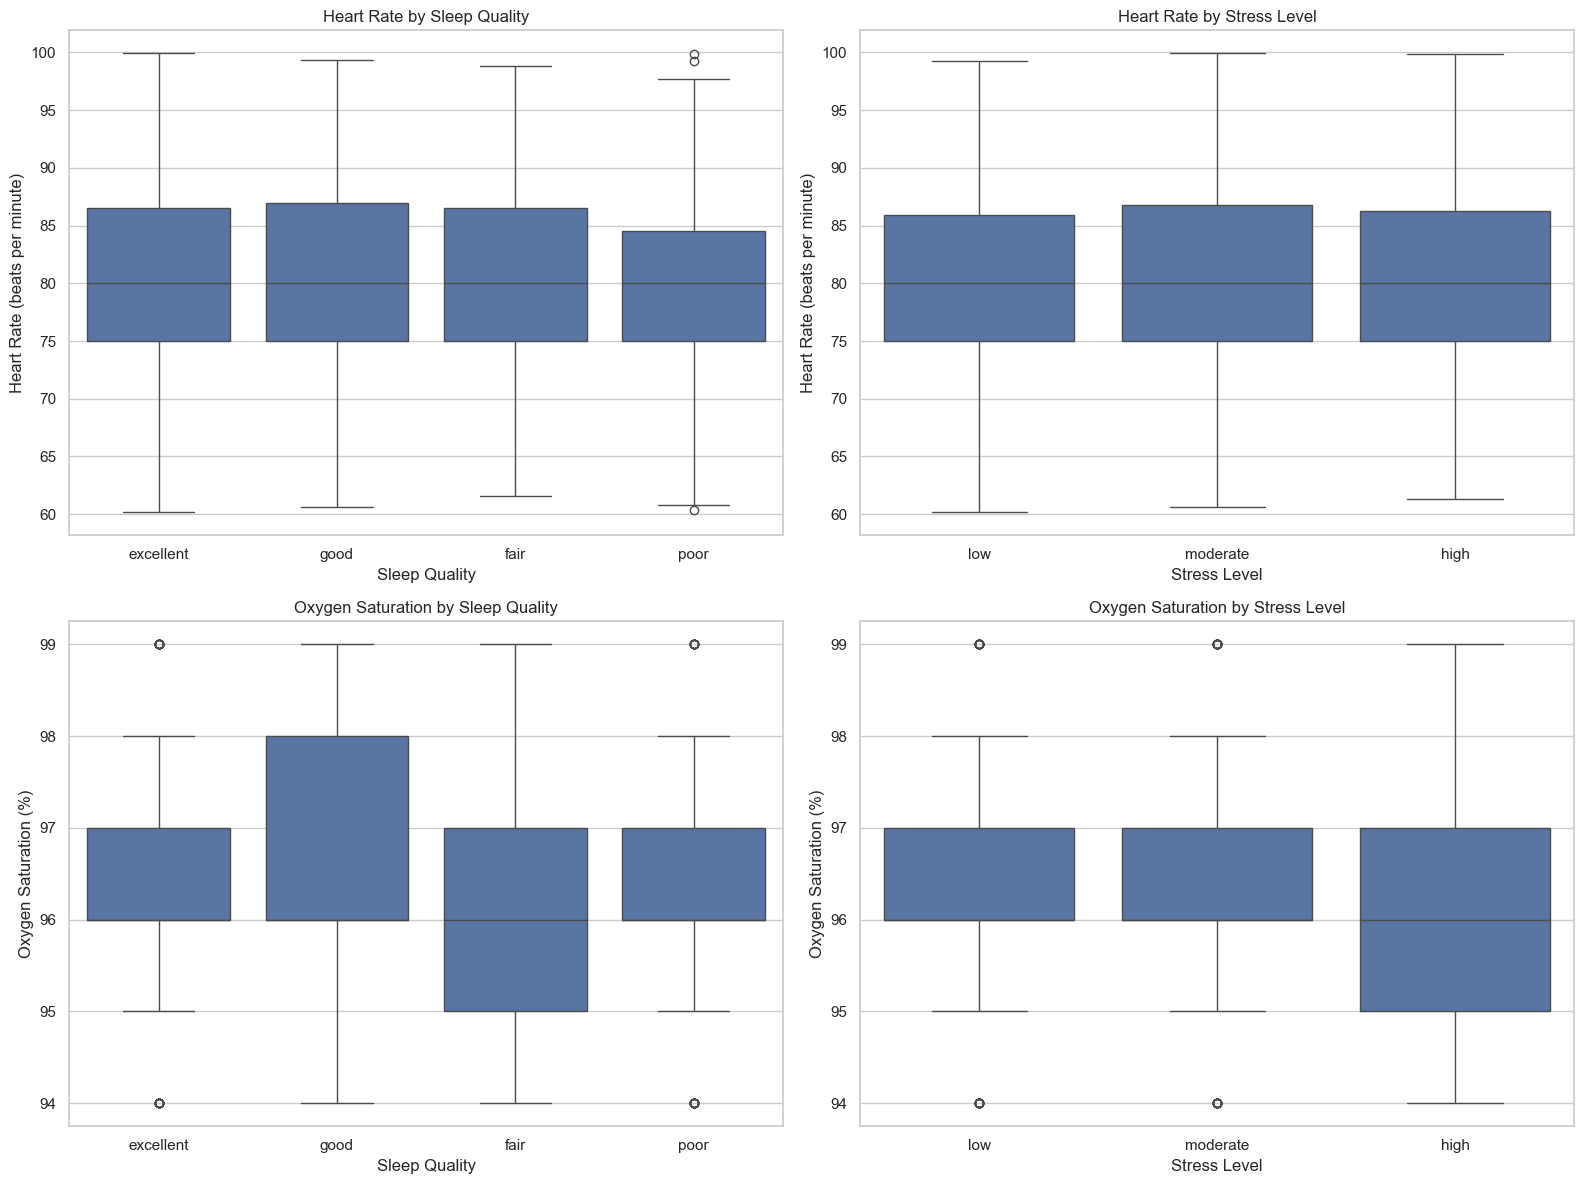

In [35]:
# Now let’s analyze heart rate and oxygen saturation by sleep quality and stress levels
# categorizing sleep quality and stress level for better analysis
sleep_quality_order = ['excellent', 'good', 'fair', 'poor']
stress_level_order = ['low', 'moderate', 'high']

# creating plots to examine relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# heart rate by sleep quality
sns.boxplot(x='SleepQuality', y='HeartRate', data=data, order=sleep_quality_order, ax=axes[0, 0])
axes[0, 0].set_title('Heart Rate by Sleep Quality')
axes[0, 0].set_xlabel('Sleep Quality')
axes[0, 0].set_ylabel('Heart Rate (beats per minute)')

# heart rate by stress level
sns.boxplot(x='StressLevel', y='HeartRate', data=data, order=stress_level_order, ax=axes[0, 1])
axes[0, 1].set_title('Heart Rate by Stress Level')
axes[0, 1].set_xlabel('Stress Level')
axes[0, 1].set_ylabel('Heart Rate (beats per minute)')

# oxygen saturation by sleep quality
sns.boxplot(x='SleepQuality', y='OxygenSaturation', data=data, order=sleep_quality_order, ax=axes[1, 0])
axes[1, 0].set_title('Oxygen Saturation by Sleep Quality')
axes[1, 0].set_xlabel('Sleep Quality')
axes[1, 0].set_ylabel('Oxygen Saturation (%)')

# oxygen saturation by stress level
sns.boxplot(x='StressLevel', y='OxygenSaturation', data=data, order=stress_level_order, ax=axes[1, 1])
axes[1, 1].set_title('Oxygen Saturation by Stress Level')
axes[1, 1].set_xlabel('Stress Level')
axes[1, 1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

##### Heart rate appears relatively consistent across different levels of sleep quality and stress, with a slight increase in variation for those reporting poor sleep. Oxygen saturation shows a minimal decrease in median values from excellent to poor sleep quality, with some outliers indicating lower saturation for excellent and good sleep. When correlated with stress levels, oxygen saturation remains largely unchanged. Overall, while there are outliers, the central tendencies suggest that neither heart rate nor oxygen saturation is greatly affected by sleep quality or stress level within this dataset.

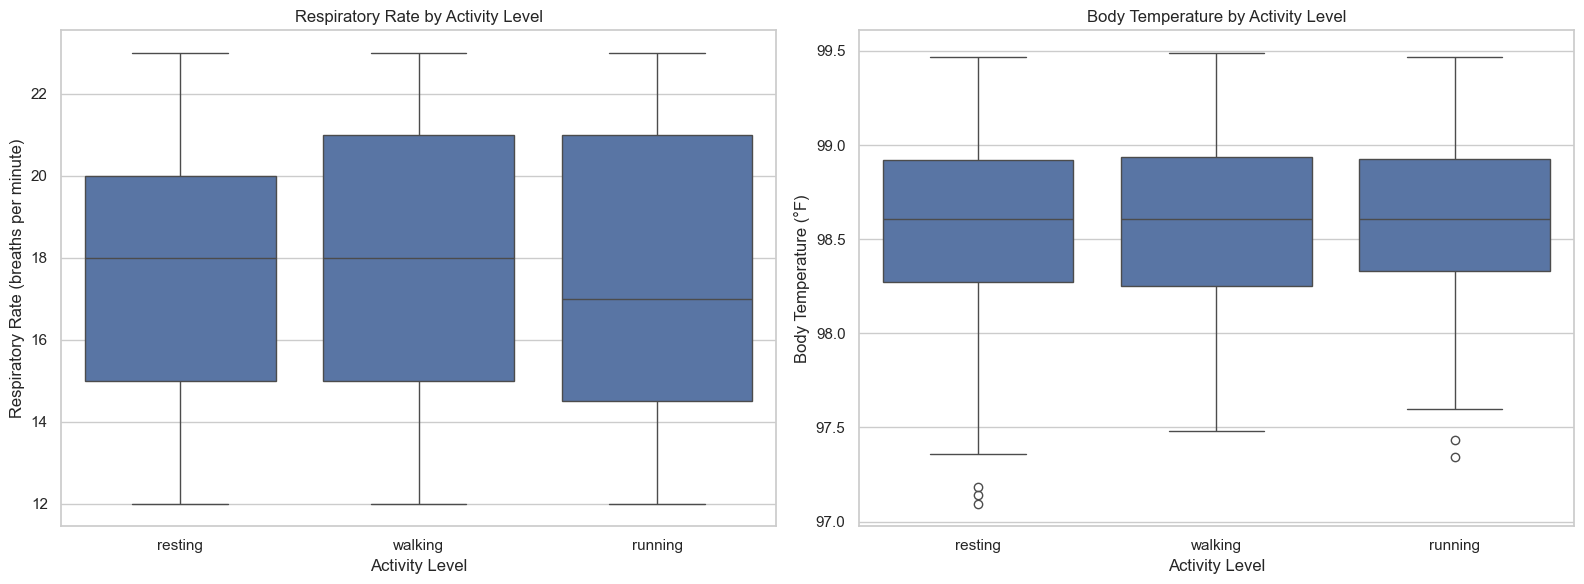

In [38]:
# Now let’s analyze the respiratory rate and body temperature by activity levels
# creating plots to examine relationships between activity level and other health metrics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# respiratory rate by activity level
sns.boxplot(x='ActivityLevel', y='RespiratoryRate', data= data, ax=axes[0])
axes[0].set_title('Respiratory Rate by Activity Level')
axes[0].set_xlabel('Activity Level')
axes[0].set_ylabel('Respiratory Rate (breaths per minute)')

# body temperature by activity level
sns.boxplot(x='ActivityLevel', y='BodyTemperature', data= data, ax=axes[1])
axes[1].set_title('Body Temperature by Activity Level')
axes[1].set_xlabel('Activity Level')
axes[1].set_ylabel('Body Temperature (°F)')

plt.tight_layout()
plt.show()

##### The respiratory rate tends to increase with activity level, as indicated by higher median rates for walking and running compared to resting. It aligns with physiological responses to exercise, where the breathing rate increases to meet oxygen demands. For body temperature, there is a slight upward trend from resting to running, which is consistent with the body heating up during physical exertion. There are outliers in body temperature at the resting and running levels, suggesting some individuals have temperatures outside the typical range for these activities. Overall, the trends observed are in line with expected physiological responses to varying levels of activity.

#### Grouping Patients


In [42]:
# function to categorize Age
def age_group(age):
    if age <= 35:
        return 'Young'
    elif age <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'

# function to categorize Blood Pressure
def bp_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Elevated'
    elif 140 <= systolic < 160 or 90 <= diastolic < 100:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

# function to categorize Heart Rate
def hr_category(hr):
    if hr < 60:
        return 'Low'
    elif hr <= 100:
        return 'Normal'
    else:
        return 'High'

# function to categorize Oxygen Saturation
def oxy_category(oxy):
    if oxy < 94:
        return 'Low'
    else:
        return 'Normal'

# applying categorizations
data['AgeGroup'] = data['Age'].apply(age_group)
data['BPCategory'] = data.apply(lambda x: bp_category(x['SystolicBP'], x['DiastolicBP']), axis=1)
data['HRCategory'] = data['HeartRate'].apply(hr_category)
data['OxyCategory'] = data['OxygenSaturation'].apply(oxy_category)

print(data[['Age', 'AgeGroup', 'SystolicBP', 'DiastolicBP', 'BPCategory', 'HeartRate', 'HRCategory', 'OxygenSaturation', 'OxyCategory']].head())

   Age     AgeGroup  SystolicBP  DiastolicBP BPCategory  HeartRate HRCategory  \
0   69       Senior         130           85   Elevated  60.993428     Normal   
1   32        Young         120           80   Elevated  98.723471     Normal   
2   78       Senior         130           85   Elevated  82.295377     Normal   
3   38  Middle-aged         111           78     Normal  80.000000     Normal   
4   41  Middle-aged         120           80   Elevated  87.531693     Normal   

   OxygenSaturation OxyCategory  
0              95.0      Normal  
1              97.0      Normal  
2              98.0      Normal  
3              98.0      Normal  
4              98.0      Normal  


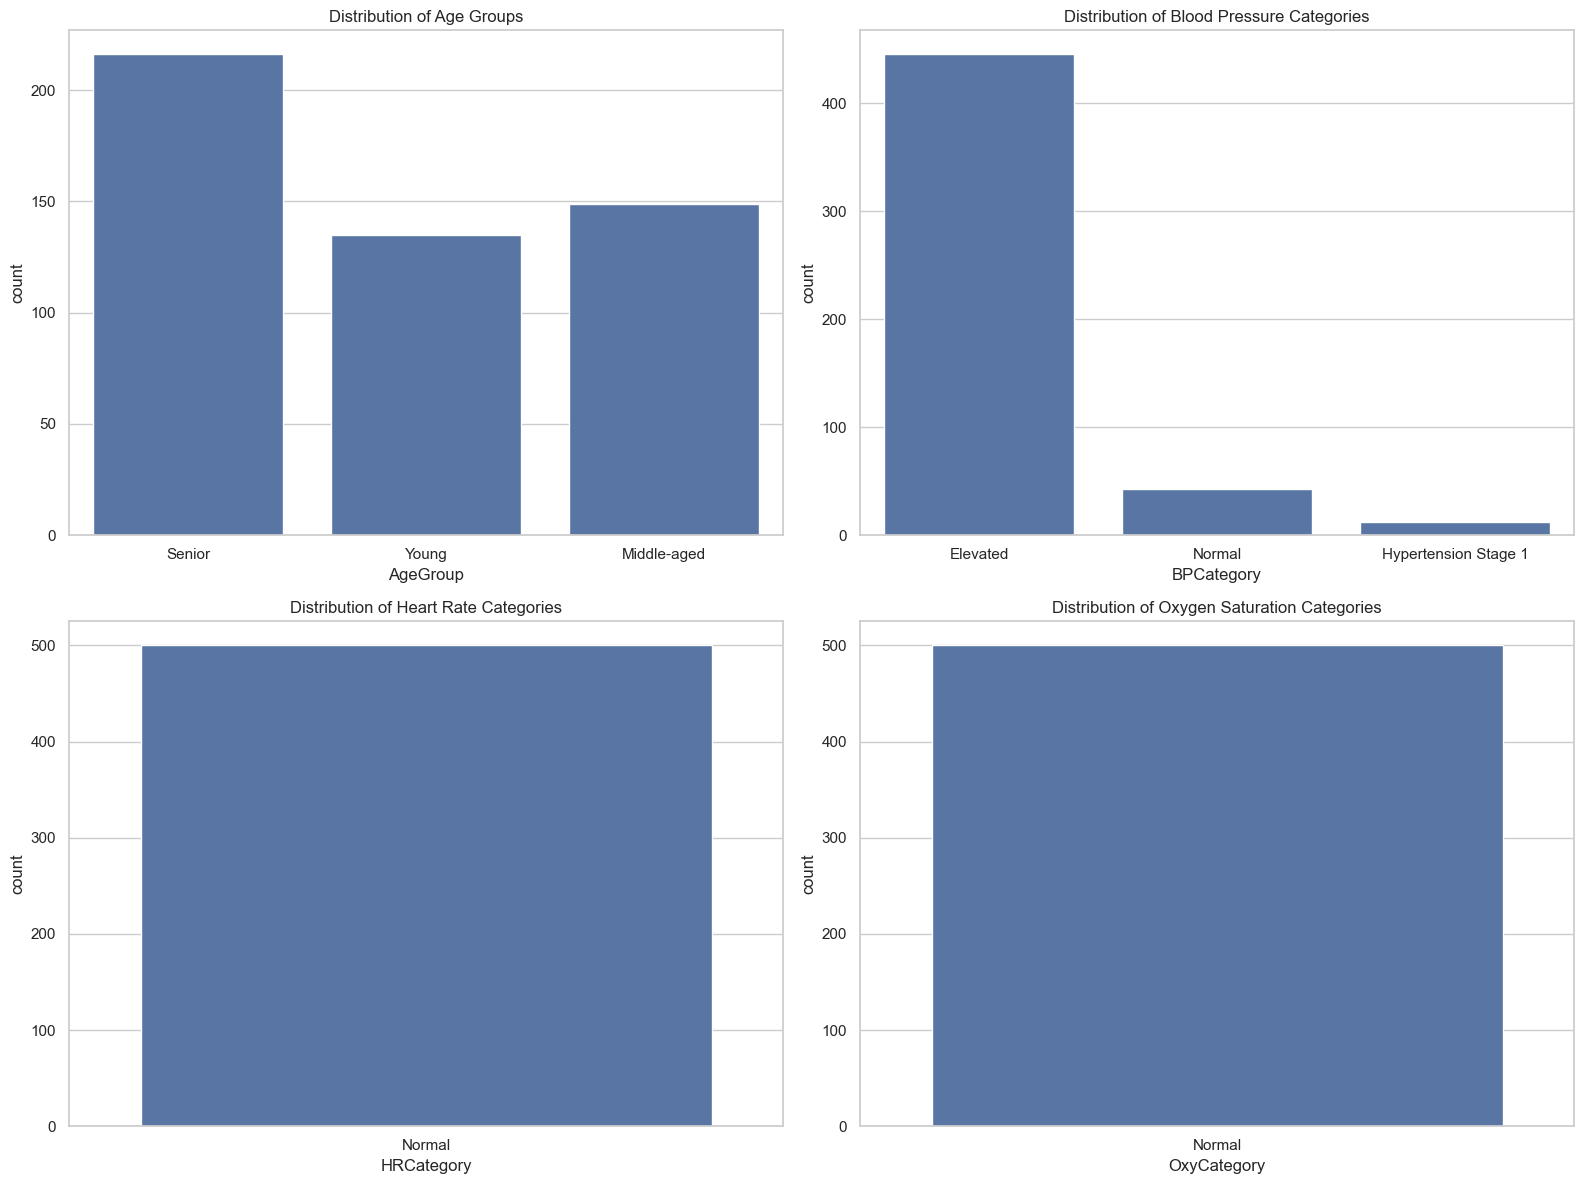

In [44]:
# Now, let’s visualize the groups
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age Group count plot
sns.countplot(x='AgeGroup', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age Groups')

# Blood Pressure Category count plot
sns.countplot(x='BPCategory', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Blood Pressure Categories')

# Heart Rate Category count plot
sns.countplot(x='HRCategory', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Heart Rate Categories')

# Oxygen Saturation Category count plot
sns.countplot(x='OxyCategory', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Oxygen Saturation Categories')

# Show the plots
plt.tight_layout()
plt.show()

##### Observation:
1. Distribution of Age Groups: The count plot shows that the ‘Senior’ category has the highest count, followed by the ‘Young’ and ‘Middle-aged’ categories. It suggests that seniors are the largest age group in this dataset.
2. Distribution of Blood Pressure Categories: The majority of the dataset falls under ‘Normal’ blood pressure, with fewer instances in the ‘Elevated’ and ‘Hypertension Stage 1’. ‘Hypertension Stage 2’ has the lowest count, indicating that severe hypertension is less common among the participants.
3. Distribution of Heart Rate Categories: Most individuals have a ‘Normal’ heart rate, with very few falling into the ‘Low’ or ‘High’ categories. It indicates that most individuals in this dataset have a heart rate that falls within the expected range.
4. Distribution of Oxygen Saturation Categories: Almost everyone has ‘Normal’ oxygen saturation levels, with very few instances of ‘Low’ saturation. It suggests that oxygen deprivation is not a common issue in this group.